1. 분류모델
    - logistic regression
    - KNN
    - LDA
    - QDA
2. Performence measure
    - ROC

3. Decision boundary

## 1. load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
np.random.seed(10)
num_obs=5000

x1=np.random.multivariate_normal([0,0],[[1,0.75],[0.75,1]],num_obs)
x2=np.random.multivariate_normal([1,4],[[1,0.75],[0.75,1]],num_obs)

In [8]:
X=np.vstack([x1,x2])
y=np.hstack((np.zeros(num_obs),np.ones(num_obs))).astype('int')

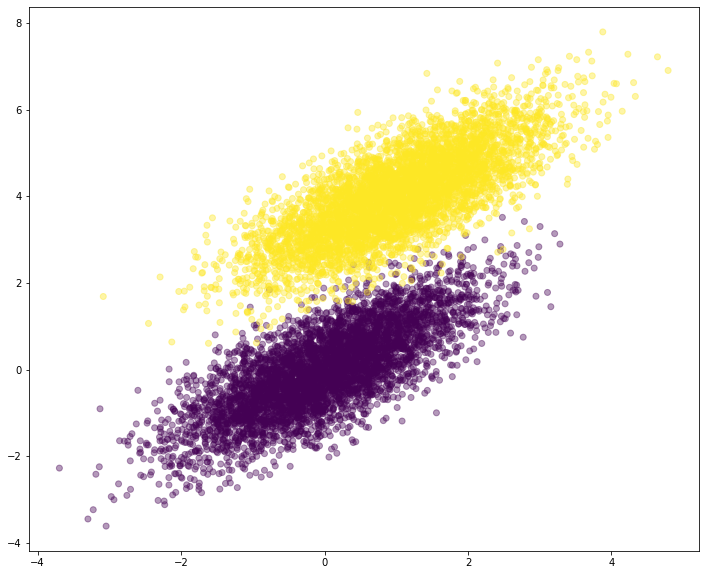

In [12]:
plt.figure(figsize=(12,10))
plt.scatter(X[:,0],X[:,1],c=y,alpha=.4)

**- comment : QDA보다 LDA가 나을것이라고 예상됨**

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# data split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

## 2. Modeling

### 2-1. logistic regression

In [23]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train) #training

LogisticRegression()

In [24]:
clf.predict(X_test)

array([1, 0, 1, ..., 1, 0, 0])

In [26]:
clf.predict_proba(X_test) #probality each sample would put in class

array([[3.55221918e-05, 9.99964478e-01],
       [9.99999913e-01, 8.72842344e-08],
       [8.38984105e-07, 9.99999161e-01],
       ...,
       [5.86276713e-07, 9.99999414e-01],
       [9.99803403e-01, 1.96596738e-04],
       [9.99995791e-01, 4.20912173e-06]])

In [28]:
clf.predict_proba([[1,4]]) #class1에 속함

array([[2.15542271e-05, 9.99978446e-01]])

### ***log(odds) = -10.29175 -3.63885x1 + 6.16888x2***

In [30]:
clf.intercept_

array([-10.29175116])

In [31]:
clf.coef_

array([[-3.6388539 ,  6.16888053]])

### 2-1-2. Performance

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,clf.predict(X_test))

0.9926666666666667

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,clf.predict(X_test))

array([[1487,   10],
       [  12, 1491]], dtype=int64)

In [42]:
from sklearn.metrics import roc_curve
fpr, tpr, trhesholds = roc_curve(y_test,clf.predict(X_test))

In [35]:
print(tpr)

[0.         0.99201597 1.        ]


Text(0, 0.5, 'TPR')

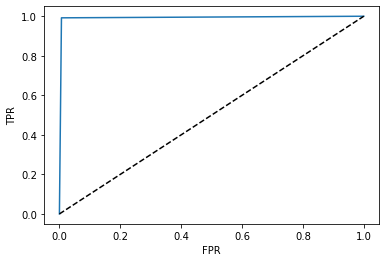

In [41]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [43]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,clf.predict(X_test))

0.9926679706718826

### 2-1-3. Decision Boundary

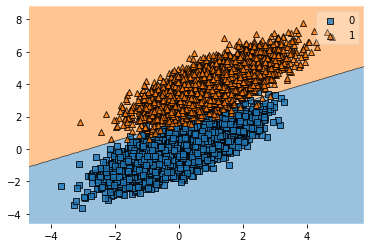

In [46]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=X,y=y,clf=clf)

### 2-2. LDA

In [47]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [48]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train,y_train) #training

LinearDiscriminantAnalysis()

### 2-2-3. Decision Boundary

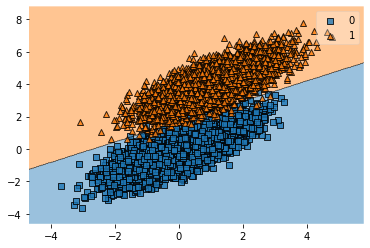

In [49]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=X,y=y,clf=clf)

### 2-3. QDA 

In [50]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [51]:
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train,y_train) #training

QuadraticDiscriminantAnalysis()

### 2-3-3. Decision Boundary

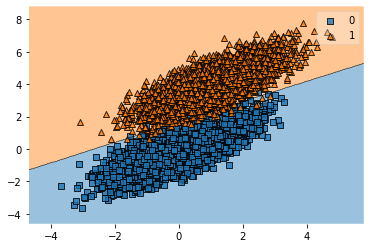

In [52]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=X,y=y,clf=clf)

### 2-4. KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
clf = KNeighborsClassifier()
clf.fit(X_train,y_train) #training

KNeighborsClassifier()

### 2-4-3. Decision Boundary

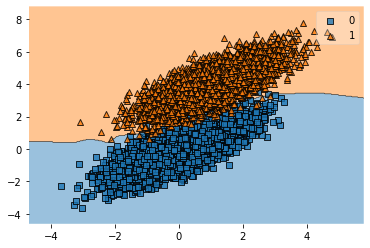

In [55]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=X,y=y,clf=clf)

# Cross validation

In [4]:
from sklearn.datasets import load_iris

iris=load_iris()

In [5]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
X=iris.data
y=iris.target

## hyperparameter optimization

In [7]:
#spilt training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [9]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

params={'C':[0.1,0.3,0.5,0.7,1.0]} #panelty term

grid_search_cv=GridSearchCV(svm.SVC(), params, cv=5)
grid_search_cv.fit(X_train,y_train)

grid_search_cv.best_params_

{'C': 1.0}

In [10]:
#accuracy
grid_search_cv.score(X_test,y_test)

1.0

## model assessment

In [11]:
from sklearn.model_selection import cross_val_score

clf=svm.SVC(C=1)
cross_val_score(clf,X,y,cv=5)

array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])